# Convolutional Neural Network
CNN for MNIST  
reference: https://www.codexa.net/cnn-mnist-keras-beginner/

In [70]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras
from sklearn.datasets import fetch_mldata
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
# datasets
mnist = fetch_mldata('MNIST original', data_home=".")

In [72]:
x = mnist["data"]
y = mnist["target"]
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


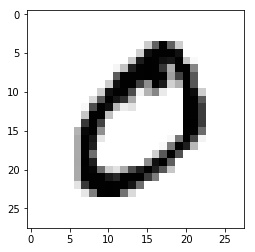

In [73]:
# visualize data
m_x = x[0].reshape([28, 28])
plt.imshow(m_x, cmap=plt.cm.binary, interpolation='nearest')

In [74]:
x_train = x[:60000]
x_test = x[60000:]
y_train = y[:60000]
y_test = y[60000:]

assert x_train.shape[0] == 60000
assert x_test.shape[0] == 10000

In [75]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [76]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [77]:
# define model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [89]:
# train
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 40s 675us/step - loss: 0.0740 - acc: 0.9776
Epoch 2/20
60000/60000 [==============================] - 41s 676us/step - loss: 0.0683 - acc: 0.9795
Epoch 3/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.0636 - acc: 0.9807
Epoch 4/20
60000/60000 [==============================] - 41s 682us/step - loss: 0.0609 - acc: 0.9812
Epoch 5/20
60000/60000 [==============================] - 41s 679us/step - loss: 0.0576 - acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.0544 - acc: 0.9833
Epoch 7/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.0519 - acc: 0.9838
Epoch 8/20
60000/60000 [==============================] - 41s 682us/step - loss: 0.0498 - acc: 0.9849
Epoch 9/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.0471 - acc: 0.9850
Epoch 10/20
60000/60000 [==============================] - 41s 682us/step - loss: 

In [90]:
# evaluate
loss, acc = model.evaluate(x_test, y_test, batch_size=128)
print(loss, acc)

10000/10000 [==============================] - 3s 300us/step
0.04910052049830556 0.9845


In [91]:
# prediction
prediction = model.predict_classes(x_test)
pd.DataFrame({'Pred': list(prediction), 'Actual': np.argmax(list(y_test))}).head()

,Pred,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
